In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [26]:
df = pd.read_csv('/Users//Desktop/PCA-Breastcancer/breast+cancer+wisconsin+diagnostic/wdbc.data')
features = pd.read_csv('/Users//Desktop/PCA-Breastcancer/Features')
features = features.iloc[:, 0].tolist()


df.columns = features
df.columns = df.columns.str.replace(',', '')
labels = df.iloc[:, 1].copy()
df = df.drop(df.columns[:2], axis=1)

In [33]:
# Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors='coerce')

In [35]:
#Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [36]:
# Compute PCA
pca = PCA(n_components=2)  # Here n_components=2 for 2 principal components, you can adjust as needed
principal_components = pca.fit_transform(df_scaled)


In [37]:
# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df = pd.concat([pca_df, labels.reset_index(drop=True)], axis=1)


In [38]:
# Plot the PCA results
import matplotlib.pyplot as plt


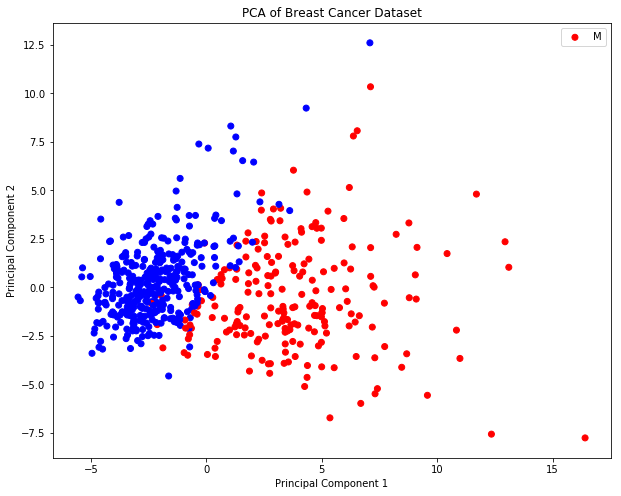

In [39]:
plt.figure(figsize=(10, 8))
colors = {'M': 'red', 'B': 'blue'}
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df.iloc[:, -1].map(colors))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.legend(labels.unique())
plt.show()

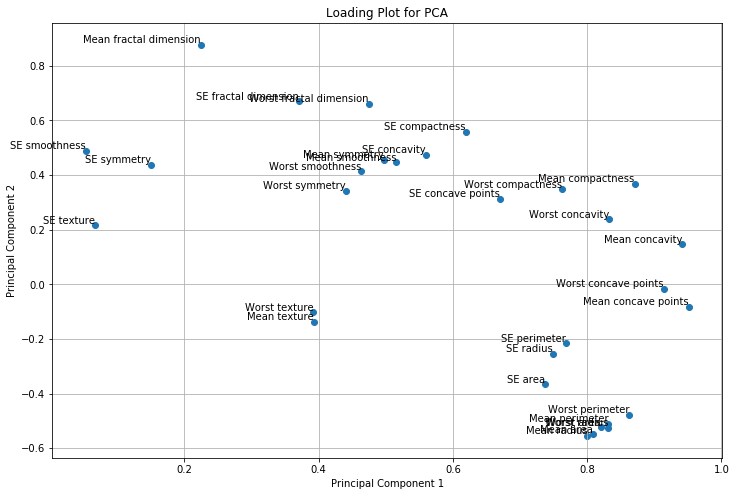

In [42]:
# Draw the loading plot
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(12, 8))
plt.scatter(loadings[:, 0], loadings[:, 1])

for i, feature in enumerate(df.columns):
    plt.text(loadings[i, 0], loadings[i, 1], feature, ha='right', va='bottom')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Loading Plot for PCA')
plt.grid()
plt.show()

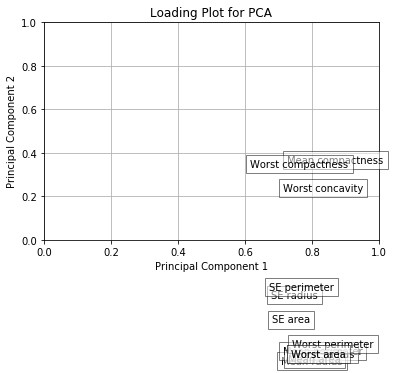

In [47]:
# Specify range around PC1 ~ 0.8
range_min = 0.7
range_max = 0.9
for i, feature in enumerate(df.columns):
    if range_min <= loadings[i, 0] <= range_max:
        plt.text(loadings[i, 0], loadings[i, 1], feature, ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Loading Plot for PCA')
plt.grid()
plt.show()

In [54]:
# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings, index=df.columns, columns=['PC1', 'PC2'])

# Print the loadings
print("Loadings:")
print(loadings_df)

Loadings:
                              PC1       PC2
Mean radius              0.800153 -0.556002
Mean texture             0.393256 -0.136290
Mean perimeter           0.831285 -0.511575
Mean area                0.808135 -0.549280
Mean smoothness          0.515632  0.446317
Mean compactness         0.870426  0.367270
Mean concavity           0.941540  0.146565
Mean concave points      0.951006 -0.081430
Mean symmetry            0.497568  0.456508
Mean fractal dimension   0.224745  0.877800
SE radius                0.749029 -0.254331
SE texture               0.067056  0.215667
SE perimeter             0.768406 -0.216318
SE area                  0.737774 -0.366476
SE smoothness            0.053298  0.487467
SE compactness           0.618971  0.558318
SE concavity             0.559471  0.473167
SE concave points        0.669454  0.313626
SE symmetry              0.149672  0.437564
SE fractal dimension     0.370934  0.669768
Worst radius             0.831679 -0.524479
Worst texture         

In [52]:
# Filter features based on the range of PC1 loadings
selected_features = [df.columns[i] for i in range(len(df.columns)) if 0.8 < loadings[i, 0] < 1]

# Print the selected features
print("Features with 0.8 < PC1 < 1:")
for feature in selected_features:
    print(feature)

Features with 0.8 < PC1 < 1:
Mean radius
Mean perimeter
Mean area
Mean compactness
Mean concavity
Mean concave points
Worst radius
Worst perimeter
Worst area
Worst concavity
Worst concave points


In [56]:
#Explained Variance: The pca.explained_variance_ratio_ array shows the variance captured by
#each principal component. A higher value means the component captures more of the data's 
#variance.
# Print the explained variance
print("Explained Variance:")
print(pca.explained_variance_ratio_)

Explained Variance:
[0.44140602 0.19056427]


Index(['ID number', 'Diagnosis', 'Mean radius', 'Mean texture',
       'Mean perimeter', 'Mean area', 'Mean smoothness', 'Mean compactness',
       'Mean concavity', 'Mean concave points', 'Mean symmetry',
       'Mean fractal dimension', 'SE radius', 'SE texture', 'SE perimeter',
       'SE area', 'SE smoothness', 'SE compactness', 'SE concavity',
       'SE concave points', 'SE symmetry', 'SE fractal dimension',
       'Worst radius', 'Worst texture', 'Worst perimeter', 'Worst area',
       'Worst smoothness', 'Worst compactness', 'Worst concavity',
       'Worst concave points', 'Worst symmetry', 'Worst fractal dimension'],
      dtype='object')


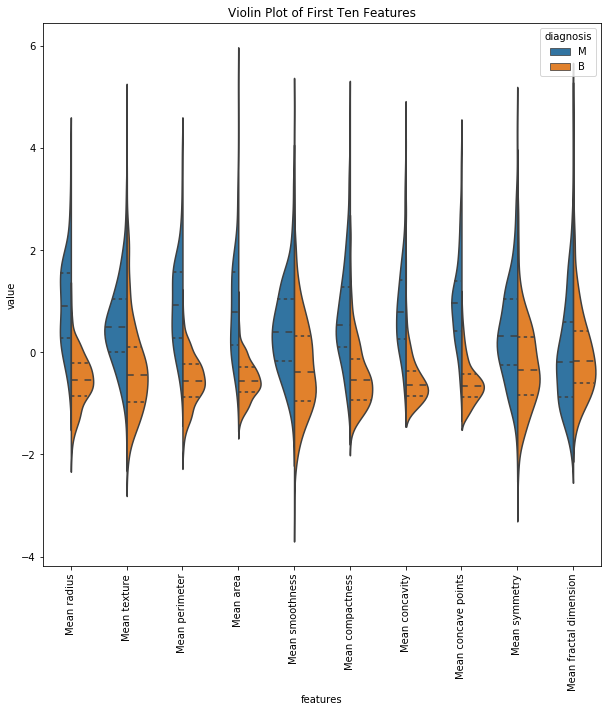

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/Users//Desktop/PCA-Breastcancer/breast+cancer+wisconsin+diagnostic/wdbc.data')

# Load feature names
features = pd.read_csv('/Users//Desktop/PCA-Breastcancer/Features')
features = features.iloc[:, 0].tolist()

# Set the column names
df.columns = features
df.columns = df.columns.str.replace(',', '')

# Print column names to check the correct name for the diagnosis column
print(df.columns)

# Separate the labels
y = df.iloc[:, 1].copy()
x = df.drop(df.columns[:2], axis=1)

# Ensure all columns are numeric
x = x.apply(pd.to_numeric, errors='coerce')

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

# Convert the diagnosis labels to a DataFrame
y = y.to_frame()

# Rename the diagnosis column to 'diagnosis' for consistency
y.columns = ['diagnosis']

# Use the first ten features for visualization
data_dia = y
data = x_scaled_df
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([data_dia, data_n_2.iloc[:,0:10]], axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value')

# Plot the violin plot
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=90)
plt.title('Violin Plot of First Ten Features')
plt.show()

Features with 0.8 < |PC1| < 1:
['Mean radius', 'Mean perimeter', 'Mean area', 'Mean compactness', 'Mean concavity', 'Mean concave points', 'Worst radius', 'Worst perimeter', 'Worst area', 'Worst concavity', 'Worst concave points']


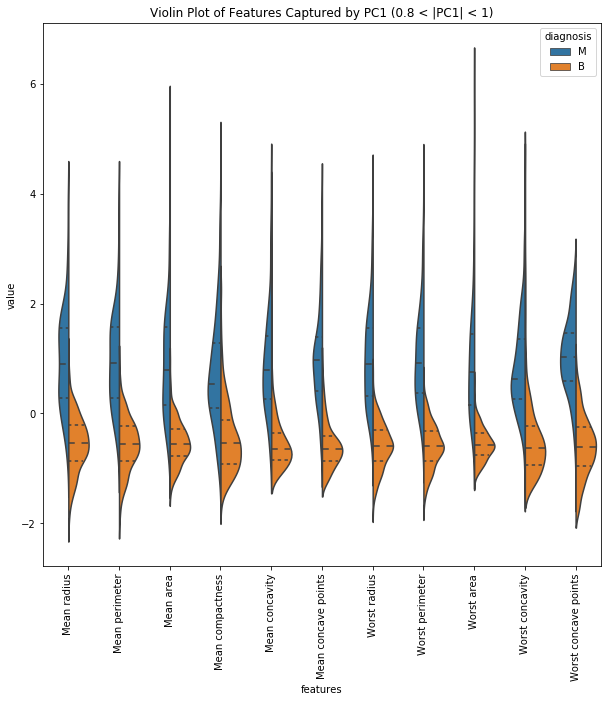

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('/Users//Desktop/PCA-Breastcancer/breast+cancer+wisconsin+diagnostic/wdbc.data')

# Load feature names
features = pd.read_csv('/Users//Desktop/PCA-Breastcancer/Features')
features = features.iloc[:, 0].tolist()

# Set the column names
df.columns = features
df.columns = df.columns.str.replace(',', '')

# Separate the labels
y = df.iloc[:, 1].copy()
x = df.drop(df.columns[:2], axis=1)

# Ensure all columns are numeric
x = x.apply(pd.to_numeric, errors='coerce')

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

# Perform PCA
pca = PCA(n_components=2)
pca.fit(x_scaled)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Identify features with loadings on PC1 in the range 0.8 < |PC1| < 1
features_pc1 = [x.columns[i] for i in range(len(x.columns)) if 0.8 < abs(loadings[i, 0]) < 1]

print("Features with 0.8 < |PC1| < 1:")
print(features_pc1)

# Convert the diagnosis labels to a DataFrame
y = y.to_frame()
y.columns = ['diagnosis']

# Prepare the data for visualization
data_dia = y
data = x_scaled_df[features_pc1]
data_n_2 = (data - data.mean()) / (data.std())  # standardization
data = pd.concat([data_dia, data_n_2], axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value')

# Plot the violin plot
plt.figure(figsize=(10, 10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=90)
plt.title('Violin Plot of Features Captured by PC1 (0.8 < |PC1| < 1)')
plt.show()
